# Laboratory 1: Linear and Logistic Regression at Industry

## Homework solution (5 points)

## Theorical Part (5 points)

Answer the following questions:

**Question 1 (1.0 point).** Write a resume to explain the workflow used in the guide to solve the first business case.(Max. 8 lines)

**Question 2 (0.5 points):** What's the importance of checking the frequency distribution of the target variable?

**Question 3 (0.5 points):** Explain the reason to split the dataset into training and test sets.

**Question 4 (1.0 point):** Why it is necessary to scale the features into values that go, for instance, between 0 and 1?

**Question 5 (1.0 point):** In the first business case, 3 performance metrics were calculated (accuracy, precision and recall). If you were to choose one of them to assess your model, which one would you use and why?

**Question 6 (1.0 point):** Hoy can the coefficients from the linear or logistic regression be interpreted?

## Business Case: Churn prediction (5 points)

### The context

Churn prediction is one of the most common problem that telecommunications companies want to address. However, it is one of the hardest. Churn is not other thing that clients walking away from the company. For example, when client A changes his line from operator X to Y. The reasons to try to predict this phenomena are obvious. Nonetheless, the problem becomes hard because there are many reasons that can push a client to leave the company. Some of the most common are:

*   The client performs a "portability" transaction to another operator. This is called voluntary churn.
*   The client stops paying his bills. Therefore, his lines become suspended and after 3 months the client is finally "deactivated" (ie. he/she is no longer considered a client). This is also called involuntary churn.

Obviuously, a client can have more than one line in the company. However, in order to keep things simple, for the purposes of this laboratory, ***we wil consider that every client has only one line***. In this part of the laboratoy, we will develop a simple model to predict the churn.

### Part I: Create the model

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

**Question 7 (0.25 points):** the file 'JulyClients.csv' contains all the lines the company had by the end of July 19 and whether they performed voluntary churn, involuntary churn or none (they are still clients). The file has 16 columns:


*   Client_ID: sequential code of the client.
*   Debt_capacity: ammount of money a person can borrow from a bank.
*   Income: ammount of money the client has to pay for his service.
*   SMS_usage: number of SMS sent in the month.
*   Debt_1M: debt from the previous month (M-1).
*   Min_callcenter: total number of minutes of calls from the client to the callcenter.
*   Client_time: measures how old is a line/contract with us.
*   MB_usage: number of MB used.
*   OTT_usage: number of MB used for OTTs.
*   Debt: ammount of money debt in the current month.
*   APP_usage: MB spent in the use of the company APP.
*   VAS_usage: number of SMS sent to VAS services.
*   Min_In_3M: number of calls a line received in the past 3 months.
*   Avg_susp_time: average number of days a line remains suspended.
*   Avg_days: average number of days after billing it takes for a line to pay.
*   Min_Out_3M: number of calls a line made in the past 3 months.
*   Churn: 0 -> No churn, 1 -> Involuntary churn, 0 -> Voluntary churn


In [0]:
# Read the dataset
# data = 

data = pd.read_csv('July_clients.csv', sep=';', encoding='utf-8', na_values=' ')

assert (data.shape[0]==5000),'The data loaded is not complete (missing rows)'
assert (data.shape[1]==17),'The data loaded is not complete (missing columns)'

**Question 8 (0.25 points):** define the target variable and the feature vector.

In [0]:
target_variable = 'Churn'
feature_vector = [x for x in data.columns if x not in [target_variable,'Client_ID']]

assert target_variable != '', 'No target variable chosen'
assert type(feature_vector)==list, 'feature_vector must be a list'
assert len(feature_vector)==15, 'Wrong number of features'

**Question 9 (0.25 points):** check the frequency distribution of the target variable. Is the dataset balanced or not?

In [4]:
# Check the target variable. 
# What are we checking here? Why is this important?
data.Churn.value_counts()
#Balanced between the three values

1    1672
2    1668
0    1660
Name: Churn, dtype: int64

**Question 10 (0.25 points):** split the dataframe in two: the feature matrix and the target vector.

In [0]:
X = pd.DataFrame(data[feature_vector])
y = pd.DataFrame(data[target_variable])

**Question 10 (0.50 points):** split the dataset in training and test set. Use 20% of the dataset for testing. If needed, use random_state=40.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

**Question 11 (0.25 points):** scale the feature values to a range of 0 to 1.


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train, y_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

**Question 12 (0.25 points):** train a LogisticRegression classifier. Use the parameter multi_class = 'multinomial' and solver = 'sag'.

In [8]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='multinomial', solver='sag')
clf.fit(X_train_s, np.array(y_train).ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

### Part II: Assess the model

**Question 13 (1.0 point):** using the classifier, predict the class. However, this time, you must use the predict_proba method. If you don't find a way to do so and need to continue, you may use the predict method, but no points will be awarded in that case.
**Suggestion:** check documentation on numpy argmax method.

In [0]:
y_pred_proba = clf.predict_proba(X_test_s)
y_pred = np.argmax(np.array(y_pred_proba),axis=1)

assert list(y_pred)== list(clf.predict(X_test_s)), 'Result does not match with predict method'

**Question 14 (0.50 points):** print the confusion matrix of the classifier. Also, evaluate the accuracy.

In [0]:
def print_confusion_matrix(confusion_matrix, accuracy):
  import seaborn as sn
  plt.figure(figsize=(10,7))
  sn.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion matrix. Acc={}'.format(accuracy))
  plt.show()  

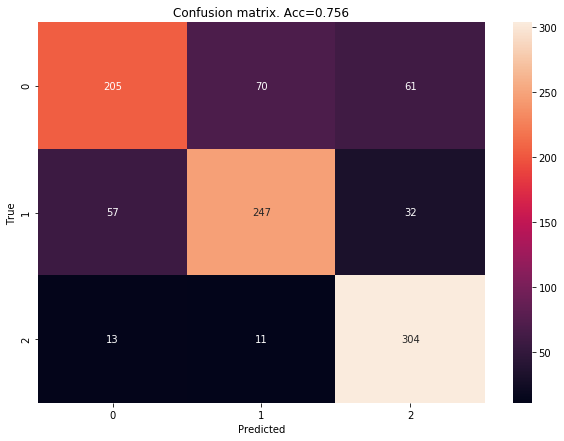

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print_confusion_matrix(cm, ac)

Everything done before is very nice for research purposes but in a company such jargon is not understandable for the managment (who are probably the sponsors of any analytics project). Therefore, another method must be used to convey the insights of the model. One way to do so is through the identification of the most important features for prediction. Hopefully, sklearn can give us a hand in that.

**Question 15 (0.50 points):**  using sklearn SelectFromModel method (use prefit=True and max_features=10), identify which features are relevant and which are not. Do the results make sense to you?

In [12]:
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(clf, prefit=True, max_features=10)
[x for x in zip(X.columns.values,select.get_support())]

[('Debt_capacity', False),
 ('Income', True),
 ('SMS_usage', False),
 ('Debt_1M', False),
 ('Min_callcenter', True),
 ('client_time', True),
 ('MB_usage', True),
 ('OTT_usage', True),
 ('Debt', False),
 ('APP_usage', True),
 ('VAS_usage', False),
 ('Min_In_3M', True),
 ('Avg_susp_time', False),
 ('Avg_days', False),
 ('Min_Out_3M', True)]

Suposse the company is trying to predict the voluntary churn (target=2). In order to do so, it is not only necessary to know which clients are likely to leave, it is also necessary to know the likelihood of that event to happen. Why? Because to prevent churn different accions should be taken according to the probability. Hence, is common practice in industry not to make prediction but to make inference (ie. calculate probability and use it as a score). Luckly, the classifier already gives us the probability (remember the predict_proba method?). 



**Question 16 (0.50 points):** using the predict_proba method, assign the correct score to each client. The output should be ONE dataframe containing the feature vector of the test set (without scaling) and the corresponding score. 

In [13]:
y_pred_proba = clf.predict_proba(X_test_s)
voluntary_churn_scores = y_pred_proba[:,2]

scored_base = X_test.copy()
scored_base['score'] = voluntary_churn_scores
scored_base.head()

,Debt_capacity,Income,SMS_usage,Debt_1M,Min_callcenter,client_time,MB_usage,OTT_usage,Debt,APP_usage,VAS_usage,Min_In_3M,Avg_susp_time,Avg_days,Min_Out_3M,score
4088,48.931958,53.153951,51.214573,52.441134,48.958625,47.495547,49.399342,48.221305,49.574454,49.285916,49.824292,51.306286,49.993403,48.843128,51.985201,0.037309
2080,50.265951,51.581128,50.941479,50.436770,51.166238,49.428768,50.566689,50.521368,51.344451,49.372821,49.236385,49.062696,49.962313,50.088023,50.572508,0.042118
41,51.613154,49.102787,50.978349,50.842939,47.982720,49.346362,48.987539,49.670139,50.525669,50.096377,50.250597,51.600845,50.917524,50.922625,49.837808,0.725755
796,49.550370,49.183137,50.983105,49.866601,50.805907,49.188410,49.169209,50.175708,51.038008,50.209463,52.071052,51.489104,49.302217,50.650342,50.577424,0.479009
354,48.490022,50.914590,49.684284,46.534117,48.825860,48.968947,48.108424,51.374878,49.091395,49.956876,48.204531,49.281935,48.849764,50.222629,50.773832,0.056961


**Question 17 (0.50 points):** in order to evaluate the performance of the scoring, add the following columns to the dataframe generated before:

*   target: the same values that y_test had.
*   target_binary: must be an integer based on the target column. The value should be 1 is the target is 2 (voluntary churn) and 0 otherwise. **Suggestion**: check the numpy **where** function.



In [0]:
scored_base['group'] = pd.qcut(scored_base['score'],10,labels=range(1,11))
scored_base['target'] = y_test
scored_base['target_binary'] = np.where(scored_base.target==2,1,0)
scored_base['counter'] = 1

In [15]:
scored_base.head()

,Debt_capacity,Income,SMS_usage,Debt_1M,Min_callcenter,client_time,MB_usage,OTT_usage,Debt,APP_usage,VAS_usage,Min_In_3M,Avg_susp_time,Avg_days,Min_Out_3M,score,group,target,target_binary,counter
4088,48.931958,53.153951,51.214573,52.441134,48.958625,47.495547,49.399342,48.221305,49.574454,49.285916,49.824292,51.306286,49.993403,48.843128,51.985201,0.037309,3,0,0,1
2080,50.265951,51.581128,50.941479,50.436770,51.166238,49.428768,50.566689,50.521368,51.344451,49.372821,49.236385,49.062696,49.962313,50.088023,50.572508,0.042118,3,0,0,1
41,51.613154,49.102787,50.978349,50.842939,47.982720,49.346362,48.987539,49.670139,50.525669,50.096377,50.250597,51.600845,50.917524,50.922625,49.837808,0.725755,9,2,1,1
796,49.550370,49.183137,50.983105,49.866601,50.805907,49.188410,49.169209,50.175708,51.038008,50.209463,52.071052,51.489104,49.302217,50.650342,50.577424,0.479009,7,2,1,1
354,48.490022,50.914590,49.684284,46.534117,48.825860,48.968947,48.108424,51.374878,49.091395,49.956876,48.204531,49.281935,48.849764,50.222629,50.773832,0.056961,3,1,0,1


### Part III: Lift curve (information)
This part is just informative (it doesn't have any mark assigned). Read it after the laboratory finishes since it is important to understand how are models actually assessed.

To evaluate the performance of the model, we can use the lift curve. Such curve answers the following question: do the clients with higher scores really have greater risk to churn? To do so, first, we must order and divide the clients in deciles based on the score. This has already been done for you. After that, we have to get how many clients have churn and how many haven't (ie. success and fail). That is done in the following lines using pandas pivot_table function.

In [0]:
pivot = pd.pivot_table(scored_base, values='counter', index='group', columns='target_binary', aggfunc=np.sum).fillna(0)
pivot.columns = ['No_churn','Churn']
pivot['Total'] = pivot['Churn'] + pivot['No_churn']

After creating the pivot table, we calculate the percentage of success and the mean percentage of success. With that data, we calculate the "lift" of each decile by dividing the success percentage of the decile by the mean percentage of success. That way, the lift represents how many times is the success of each decile better than the average. As you may suspect, the higher decile (higher score), the higher the lift should be. This way, if we make a lineplot of the lift by decile, we should obtain a almost monotonic increasing line like the one obtained in the last figure.

In [0]:
pivot['Pct'] = pivot['Churn']/pivot['Total']
mean_pct = pivot['Pct'].mean()
pivot['Lift'] = pivot['Pct']/mean_pct

In [18]:
pivot

,No_churn,Churn,Total,Pct,Lift
group,,,,,
1,100.0,0.0,100.0,0.00,0.000000
2,99.0,1.0,100.0,0.01,0.030488
3,100.0,0.0,100.0,0.00,0.000000
4,99.0,1.0,100.0,0.01,0.030488
5,94.0,6.0,100.0,0.06,0.182927
6,85.0,15.0,100.0,0.15,0.457317
7,46.0,54.0,100.0,0.54,1.646341
8,19.0,81.0,100.0,0.81,2.469512
9,14.0,86.0,100.0,0.86,2.621951


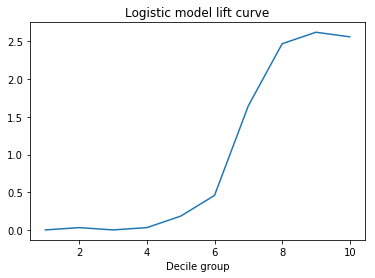

In [21]:
plt.plot(range(1,11),pivot['Lift'])
plt.xlabel('Decile group')
plt.title('Logistic model lift curve')
plt.show()

As can be seen from this image, the model is working. It is correctly assigning higher scores to clients that actually churn. A bad scoring model would present a non-monotonic behaviour.

## Physical Case: System Identification (5 points)

### The context

In Control and Automation Engineering, a *plant* is a physical system with inputs and outputs that must be regulated in order to have a desired behaviour.

A DC motor is one of the most common actuators present in industry. In order to control a system that includes a DC motor, we need to have an appropiate mathematical model of it. In this section of the lab, we are going to find the parameters of a DC motor with a *linear regression* approach.

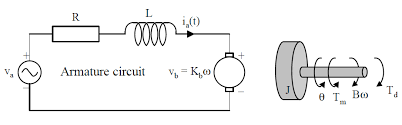

In the figure above, the DC motor is divided in 2 sections, so that we can get the equations we need. We are going to apply the knowledge we got from our physics courses in order to model the plant.

Where:
* $v_a= $ `u_a`: Is the input voltage to the motor. In volts.
* $R$: Is an ohmic resistor, which represents the electrical resistance of the internal motor coil. In ohms.
* $L$: Is the equivalent inductance of the motor. In henries.
* $v_b$: Is the electromotive force. In volts.
* $i_a = I$: Is the electrical current of the circuit. In amperes.
* $K_b$: Is the motor's back-emf constant. In $V\,s/rad$.
* $J$: Is the moment of inertia. In $kg\,m^2$.
* $\theta = $ `theta`: Is the axis angle. In radians.
* $\omega = $ `theta_p`: Is the axis angular speed. In $rad/s$.
* $\alpha = $ `theta_pp`: Is the axis angular acceleration. In $rad/s^2$.
* $T_m$: Is the output torque. In $N\,m$.
* $B$: Is the viscous friction coefficient.
* $T_d$: Is the disturbance torque. In $N\,m$. **For this lab, it will be considered negligible**.

Consider that the input of the system is the voltage $v_a$, so it is a known signal.

From the electrical perspective, applying Kirchhoff's Voltage Law, we have:

$\sum V = 0$

Replacing the relations for the voltage at each element:

$u_a = I R + L \dot I+K_b \omega$

From the mechanical perspective, applying Newton's Law for angular dynamic equilibrium, we have:

$\sum T = 0$

Replacing terms we get:

$T_m-f=J\, \ddot \theta$

### Part I

In [0]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import seaborn as sn

The file 'motorData.csv' contains the measured data of the motor. The input applied is a unitary step signal.


Consider that the electrical resistance $R=5.35\, \Omega$ was measured with a multimeter.

In [0]:
# Read the dataset
dataset = pd.read_csv('motorData.csv',
                      sep=',',
                      encoding='utf-8',
                      na_values=' ')

In [24]:
dataset.describe()

,I,Ip,theta,theta_p,theta_pp,u_a
count,4065.000000,4065.000000,4065.000000,4065.000000,4065.000000,4065.0
mean,0.152672,34.918433,0.002687,1.454860,431.744202,1.0
std,0.039215,58.424004,0.002287,0.696847,310.771878,0.0
min,0.000000,-0.417269,0.000000,0.000000,0.000000,1.0
25%,0.150240,-0.160099,0.000491,0.936599,134.578973,1.0
50%,0.173019,4.959191,0.002223,1.735999,364.933920,1.0
75%,0.174686,42.397455,0.004627,2.055703,731.544687,1.0
max,0.174904,254.452926,0.007273,2.158674,942.532515,1.0


Using only the given equations from the electrical analysis done above, formulate the linear relation between the variables, in order to define your *hypotesis function* $h_\theta$ (acording to the slides given at the theorical classes). Write it down **(1.0 marks)**.

$h_\theta \equiv I R = u_a - L \dot I-K_b \omega$

Then, create a new ***numpy*** array that has only the relevant feature columns **(0.5 marks)**.

In [25]:
#The required columns are 'I','Ip','theta_p'
dataForH = dataset[['Ip','theta_p','u_a']]
dataForH.describe()

,Ip,theta_p,u_a
count,4065.000000,4065.000000,4065.0
mean,34.918433,1.454860,1.0
std,58.424004,0.696847,0.0
min,-0.417269,0.000000,1.0
25%,-0.160099,0.936599,1.0
50%,4.959191,1.735999,1.0
75%,42.397455,2.055703,1.0
max,254.452926,2.158674,1.0


In [26]:
datos = dataForH.values #para verificar si los alumnos consiguieron los valores
#correctos, se pueden comparar las sumas en los ejes 0 y 1
datos.sum(axis=0)

array([141943.43114382,   5914.00463797,   4065.        ])

In [27]:
datos.sum(axis=1)

array([255.4529262 , 255.02720421, 254.60216343, ...,   2.79262957,
         2.79287796,   2.79312647])

Using the [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) **Multiclass Linear Regressor**, train a model in order to find the values for the electrical motor coefficients. Then, write them down **(1.5 marks)**.

In [28]:
#import numpy as np
from sklearn.linear_model import LinearRegression
X = datos
X.shape

(4065, 3)

In [29]:
u_a = dataset.values[:,5] #otra forma: u_a = datos[:,2]
u_a.shape

(4065,)

In [30]:
u_a-datos[:,2] #son el mismo vector

array([0., 0., 0., ..., 0., 0., 0.])

In [31]:
y = 5.35*dataset.values[:,0] #y=5.35*I
reg = LinearRegression().fit(X,y)
reg.score(X,y)

1.0

In [32]:
reg.coef_, reg.intercept_

(array([-0.00393, -0.0316 ,  0.     ]), 0.9999999998851474)

In order to make your code more general and scalable, write a program that receives an *sklearn.linear_model* object and prints the  values of the motor coefficients. You need to access the internal information of the models when you use external libraries **(1.0 marks)**.

In [33]:
def printCoefficients(regressorModel):
  #Internal Variables:
  param_1 = 5.35;#Dato del problema!
  param_i = -regressorModel.coef_[0];#Cuidado con el signo
  param_n = -regressorModel.coef_[1];#Cuidado con el signo
  
  #Output
  #print("The system parameters are: R =",param_1,", Param_i =",param_i,"and Param_n =",param_n)
  
  print("The system parameters are: R =",param_1,", L =",param_i,"and K_b =",param_n)
  
printCoefficients(reg)

The system parameters are: R = 5.35 , L = 0.0039299999989749765 and K_b = 0.03159999997730316


### Part II

Make the following graphs, with two features each one. The relations between the features are linear?

In [0]:
import seaborn as sns

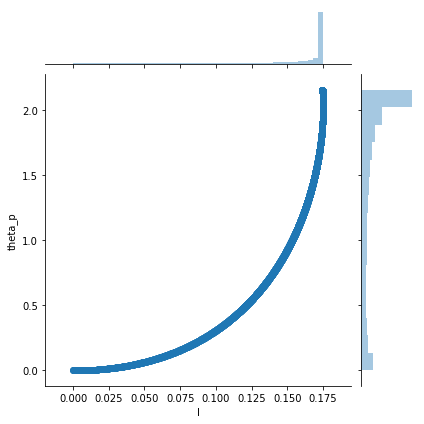

In [38]:
sns.jointplot(x='I',y='theta_p',data=dataset)

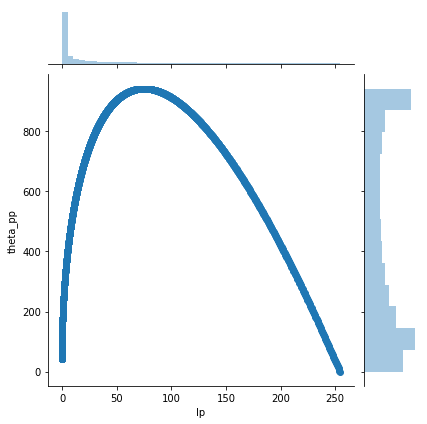

In [39]:
sns.jointplot(x='Ip',y='theta_pp',data=dataset)

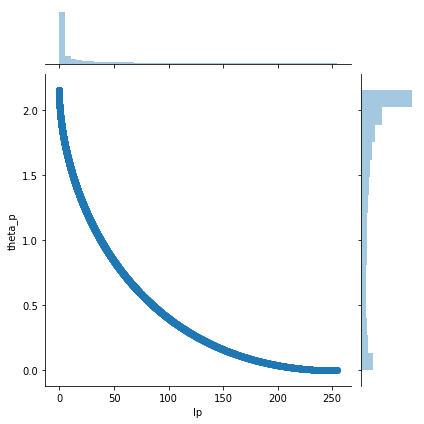

In [40]:
sns.jointplot(x='Ip',y='theta_p',data=dataset)

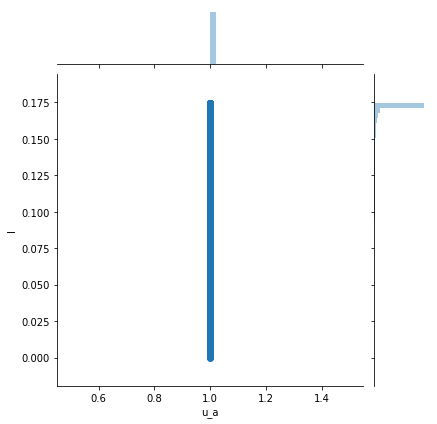

In [41]:
sns.jointplot(x='u_a',y='I',data=dataset)

Here you have graphs made from data with different levels of noise.

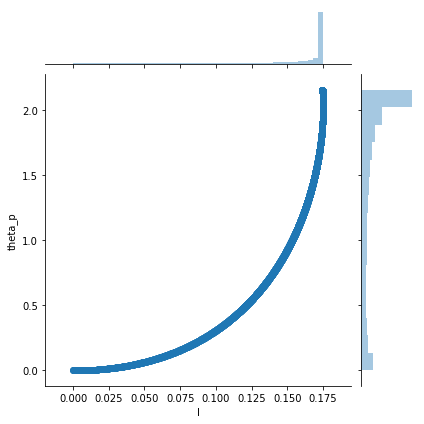

In [42]:
sns.jointplot(x='I',y='theta_p',data=dataset) #motorDataNoisy

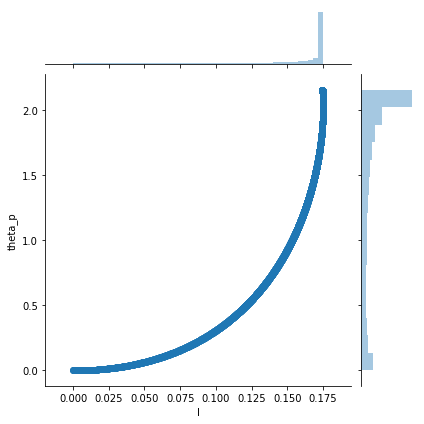

In [43]:
sns.jointplot(x='I',y='theta_p',data=dataset) #motorDataNoisy2

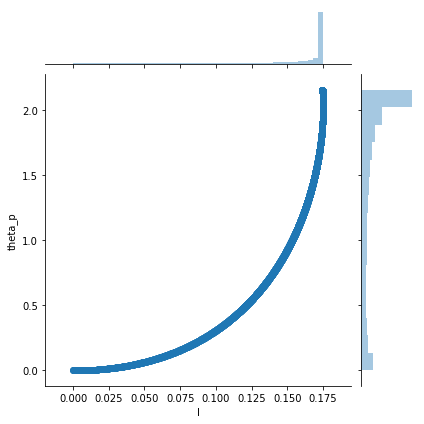

In [44]:
sns.jointplot(x='I',y='theta_p',data=dataset) #motorDataNoisy3

Explain why a **linear** regressor with the clean data (i.e., without noise), gives a perfect score even if the graphs above show **non-linear** relations between some features. Is it also related with the amount of data? **(1.0 marks)**.

In the case where there is no presence of noise, according to the relation obtained by the electrical analysis, there is a linear relation between the hypotesis function  hθ=IR  and the weighted sum of the other relevant parameters ('Ip','theta_p','u_a'). It doesn't matter if there is no linear relation between the features, there is no reason for that. There could exist nonlinearities that are canceled with the execution of the weighted sum. Also, it is not related with the amount of data.

### Results Verification

**Verify your results with the following paper**:
Virgala, I. , & Kenderová, P. F. M. (2013). Friction Effect Analysis of a DC Motor. American Journal of Mechanical Engineering, 1(1), 1-5.

# Appendix: Codes for Google Drive Sync

In [0]:
#LOAD THE DRIVE HELPER AND MOUNT
from google.colab import drive

#THIS WILL PROMPT FOR AUTHORIZATION
drive.mount('/content/drive')

!ls "/content/drive/My Drive/ZZZ" #ROUTING EXAMPLE
#/content/drive ROOT DIRECTORY